## Data Science - Exploratory Data Analysis of Video Games Sales

In [1]:
## library data manipulation 
import numpy as np
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

## library data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px;
import plotly.graph_objects as go;

In [2]:
# load-dataset
dataset = pd.read_csv("../dataset/vgsales_after_smoothing.csv")
print(dataset.head(5))

   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37


- calculate total sales in each region

In [3]:
# calculate total sales in each region
df_sales = dataset[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].aggregate("sum").reset_index()
df_sales = df_sales.set_axis(["Region", "Sales"], axis=1)
print(df_sales)

        Region    Sales
0     NA_Sales  4327.38
1     EU_Sales  2406.69
2     JP_Sales  1284.22
3  Other_Sales   788.89


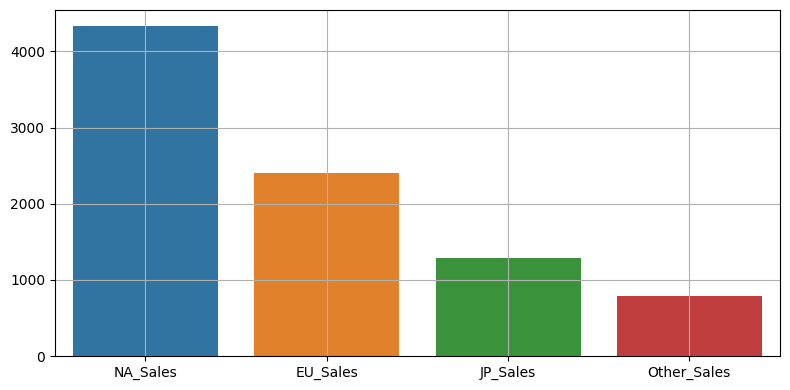

In [4]:
# create figure
fig, ax = plt.subplots(figsize=(8,4))

# create barplot
sns.barplot(data=df_sales, x="Region", y="Sales", hue="Region")

# set labels
ax.set_title("")
ax.set_xlabel("")
ax.set_ylabel("")
ax.grid(True)

# display plot
fig.tight_layout()
plt.show()

In [5]:
def grouping_sales(columns, dataset):

  # process grouping
  df = dataset.groupby(columns)[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].aggregate("sum").reset_index()

  # sorting values
  df = df.sort_values(by=["Global_Sales"], ascending=False)

  # return values
  return df

In [6]:
def unpivot_sales(columns, dataset):

  # process unpivot
  df = pd.melt(
    frame=dataset, id_vars=[columns], var_name='Region', value_name='Sales',
    value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
  )
  
  # return values
  return df

In [7]:
def barplot(dataset, x, y, hue, title):

  # create figure
  fig, ax = plt.subplots(figsize=(8,4))
  
  # create barplot
  sns.barplot(data=dataset, x=x, y=y, hue=hue)

  # set labels
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.grid(True)

  # display plot
  fig.tight_layout()
  plt.show()

- Best game-name in each region

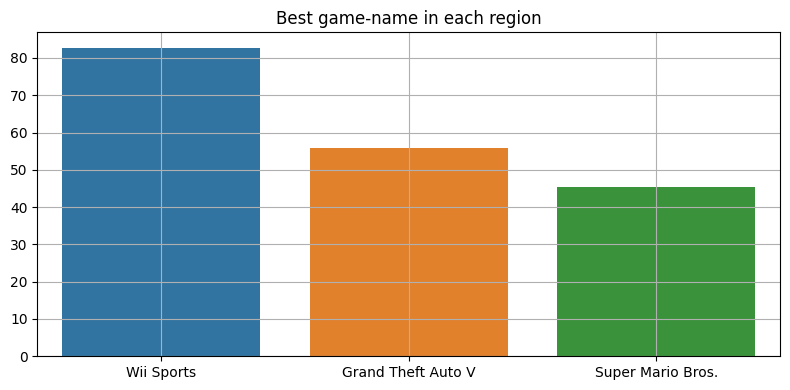

In [8]:
# grouping by game-name
df_name = grouping_sales("Name", dataset)
df_name = df_name.head(3)

# call func barplot
barplot(dataset=df_name, x="Name", y="Global_Sales", hue="Name", title="Best game-name in each region")

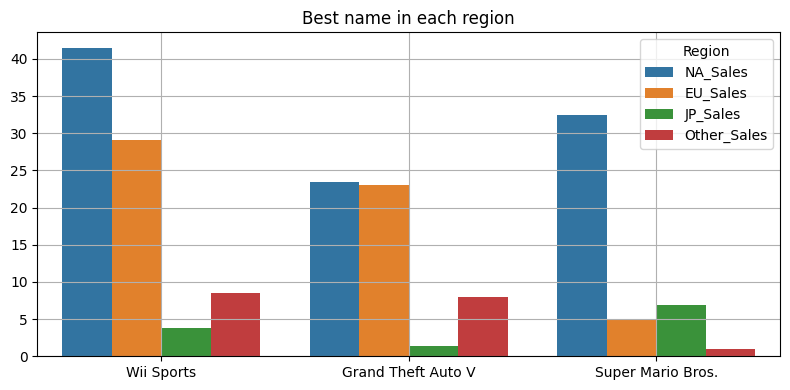

In [9]:

# grouping by game-name
df_name = unpivot_sales("Name", df_name)

# call func barplot
barplot(dataset=df_name, x="Name", y="Sales", hue="Region", title="Best name in each region")

- Best platform in each region

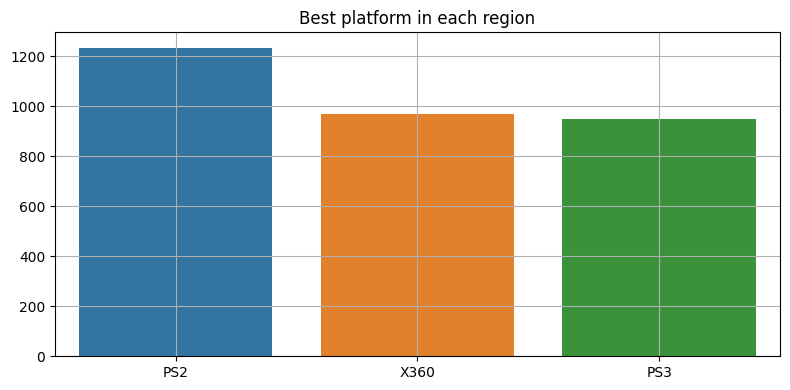

In [10]:
# grouping by platform
df_platform = grouping_sales("Platform", dataset)
df_platform = df_platform.head(3)

# call func barplot
barplot(dataset=df_platform, x="Platform", y="Global_Sales", hue="Platform", title="Best platform in each region")

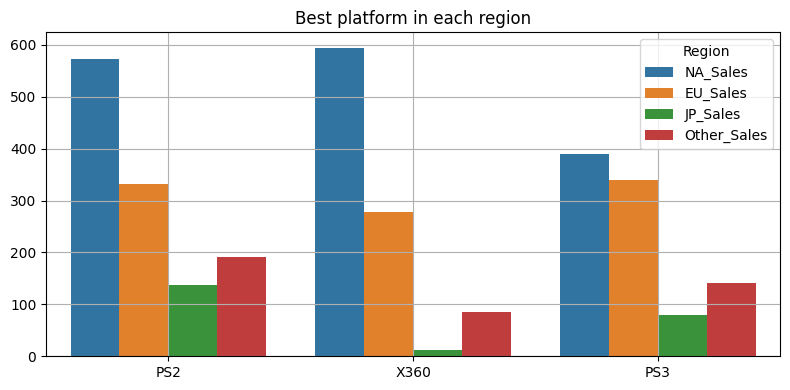

In [11]:
# grouping by platform
df_platform = unpivot_sales("Platform", df_platform)

# call func barplot
barplot(dataset=df_platform, x="Platform", y="Sales", hue="Region", title="Best platform in each region")

- Best genre in each region

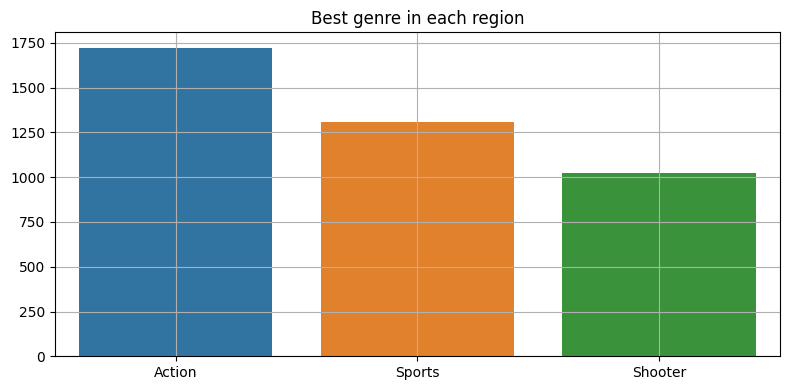

In [12]:
# grouping by genre
df_genre = grouping_sales("Genre", dataset)
df_genre = df_genre.head(3)

# call func barplot
barplot(dataset=df_genre, x="Genre", y="Global_Sales", hue="Genre", title="Best genre in each region")

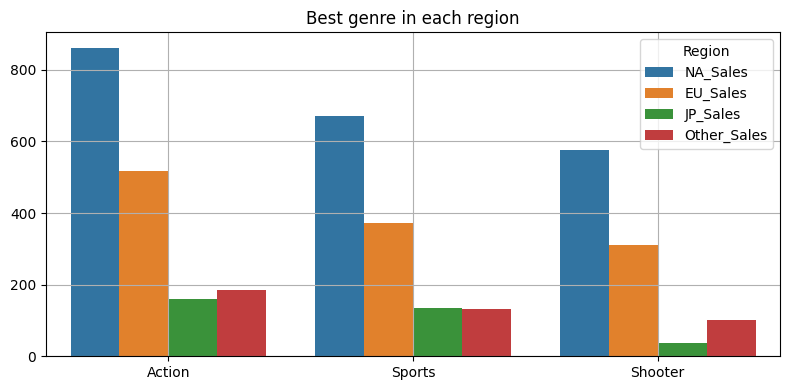

In [13]:
# grouping by genre
df_genre = unpivot_sales("Genre", df_genre)

# call func barplot
barplot(dataset=df_genre, x="Genre", y="Sales", hue="Region", title="Best genre in each region")

- Best publisher of video games sales

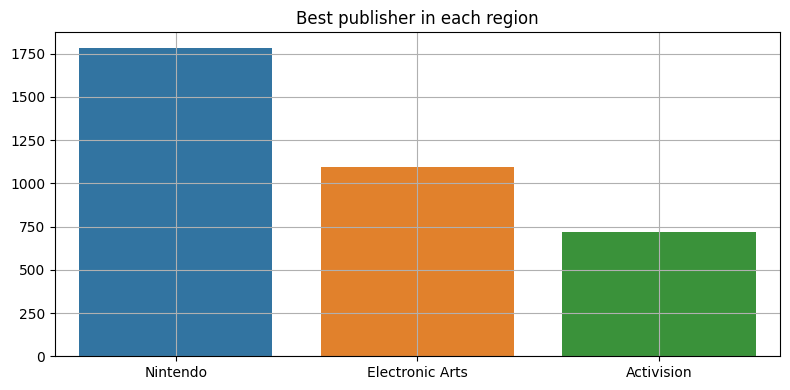

In [14]:
# grouping by publisher
df_publisher = grouping_sales("Publisher", dataset)
df_publisher = df_publisher.head(3)

# call func barplot
barplot(dataset=df_publisher, x="Publisher", y="Global_Sales", hue="Publisher", title="Best publisher in each region")

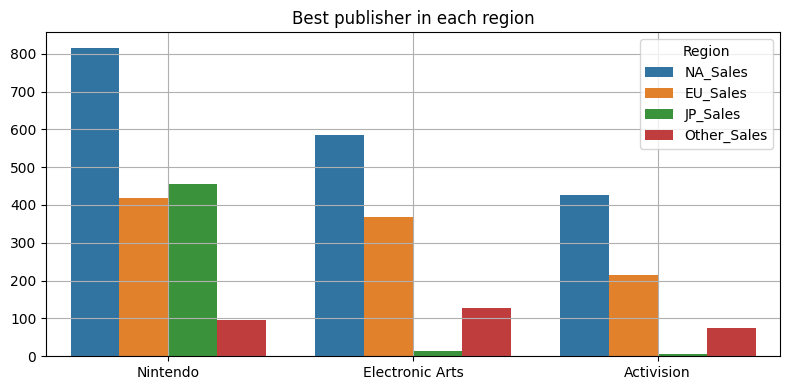

In [15]:
# grouping by publisher
df_publisher = unpivot_sales("Publisher", df_publisher)

# call func barplot
barplot(dataset=df_publisher, x="Publisher", y="Sales", hue="Region", title="Best publisher in each region")

In [ ]:
# Hello